<a href="https://colab.research.google.com/github/OliverRevilla/Machine-Learning-Python/blob/main/Regresion_lineal_multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Python/CURSO INFOPUC/Copia de sensor lb.csv', sep = ';')
dataset.head()

,Activo_id,ciclo,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,max_ciclo,count_down
0,1,1,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,192,191
1,1,2,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,192,190
2,1,3,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,192,189
3,1,4,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,192,188
4,1,5,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,192,187


In [ ]:
# seleccionamos un activo 
dataset = dataset.query('Activo_id == 2')

In [ ]:
# eliminando columnas
col = ['Activo_id', 'ciclo','max_ciclo', 'count_down']
dataset2 = dataset.drop(columns=col, axis = 1)
dataset2

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
192,518.67,641.89,1583.84,1391.28,14.62,21.60,554.53,2388.01,9054.72,1.3,46.93,522.33,2388.06,8137.72,8.3905,0.03,391,2388,100,38.94,23.4585
193,518.67,641.82,1587.05,1393.13,14.62,21.61,554.77,2387.98,9051.31,1.3,47.24,522.70,2387.98,8131.09,8.4167,0.03,392,2388,100,39.06,23.4085
194,518.67,641.55,1588.32,1398.96,14.62,21.60,555.14,2388.04,9054.24,1.3,47.22,522.58,2387.99,8140.58,8.3802,0.03,391,2388,100,39.11,23.4250
195,518.67,641.68,1584.15,1396.08,14.62,21.61,554.25,2387.98,9058.01,1.3,47.10,522.49,2387.93,8140.44,8.4018,0.03,391,2388,100,39.13,23.5027
196,518.67,641.73,1579.03,1402.52,14.62,21.60,555.12,2388.03,9058.15,1.3,47.25,522.27,2387.94,8136.67,8.3867,0.03,390,2388,100,39.18,23.4234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,518.67,643.78,1602.03,1429.67,14.62,21.61,551.46,2388.16,9084.13,1.3,48.21,520.07,2388.20,8174.85,8.5199,0.03,398,2388,100,38.42,23.0358
475,518.67,643.91,1601.35,1430.04,14.62,21.61,551.96,2388.22,9089.87,1.3,48.18,519.95,2388.21,8166.83,8.5291,0.03,395,2388,100,38.23,23.1196
476,518.67,643.67,1596.84,1431.17,14.62,21.61,550.85,2388.20,9098.67,1.3,48.27,519.91,2388.22,8164.83,8.5242,0.03,396,2388,100,38.39,23.1155
477,518.67,643.44,1603.63,1429.57,14.62,21.61,551.61,2388.18,9102.01,1.3,48.14,519.51,2388.22,8169.97,8.4932,0.03,395,2388,100,38.33,23.0169


In [ ]:
#Seleccionando las variables
X = dataset2.iloc[:,:-1].values
Y = dataset2.iloc[:,-1].values

In [ ]:
#Dividimos el dataset en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(229, 20) (229,) (58, 20) (58,)


In [ ]:
# Creando el modelo
# Ajustar el modelo de Regresión Lineal múltiple con el conjunto de entrenamiento

from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(regression.intercept_)

4582625.0927648535


In [ ]:
# Determinar el número de variables que aportan valor al modelo
regression.rank_

15

In [ ]:
regression.singular_

array([2.68485561e+02, 6.20768933e+01, 5.59691339e+01, 4.60414283e+01,
       1.44936338e+01, 6.81398115e+00, 4.87854517e+00, 4.28987404e+00,
       1.64182888e+00, 1.48757564e+00, 5.02969098e-01, 4.35617612e-01,
       2.89864415e-01, 3.30224771e-02, 2.23924193e-11, 1.06430323e-15,
       3.74909874e-17, 4.29320480e-20, 0.00000000e+00, 0.00000000e+00])

In [ ]:
# Hacer la predicción
Y_pred = regression.predict(X_test)
Y_pred

array([23.43180759, 23.34113737, 23.42601076, 23.30436895, 23.32533817,
       23.41065972, 23.38400792, 23.25895979, 23.44017783, 23.41764185,
       23.14497903, 23.33125839, 23.42596254, 23.42129669, 23.41483209,
       23.3233842 , 23.29195241, 23.37075897, 23.30071518, 23.38772976,
       23.37145371, 23.22030804, 23.37929548, 23.07352958, 23.38462633,
       23.39959563, 23.27729602, 23.26746006, 23.39266528, 23.02612749,
       23.33309459, 23.42919087, 23.4354993 , 23.34551467, 23.4254051 ,
       23.08638528, 23.42076169, 23.39785271, 23.42785648, 23.42008314,
       23.38599121, 23.3318669 , 23.34804299, 23.33357599, 23.24599719,
       23.39210693, 23.38460368, 23.3050255 , 23.42675266, 23.13168582,
       23.38302194, 23.08733936, 23.11982445, 23.27311661, 23.41274498,
       23.40179846, 23.19915351, 23.4293537 ])

In [ ]:
# Realizando la comparación
comparativa = np.concatenate([Y_test.reshape(-1,1), Y_pred.reshape(-1,1)], axis = 1)
df = pd.DataFrame(comparativa,columns = ['Valores reales','Valores predichos'])
df.head()

,Valores reales,Valores predichos
0,23.3796,23.431808
1,23.2931,23.341137
2,23.3075,23.426011
3,23.2931,23.304369
4,23.2923,23.325338


In [ ]:
df.corr()

,Valores reales,Valores predichos
Valores reales,1.000000,0.883229
Valores predichos,0.883229,1.000000


Text(0, 0.5, 'Valores Reales')

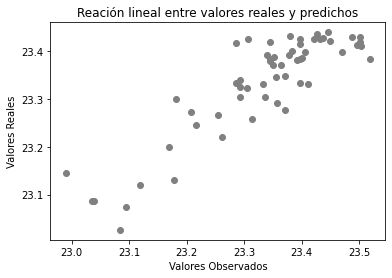

In [ ]:
# Gráfica de los datos de entrenamiento
plt.scatter(Y_test, Y_pred, color = 'gray')
plt.title('Reación lineal entre valores reales y predichos')
plt.xlabel('Valores Observados')
plt.ylabel('Valores Reales')

In [ ]:
# Métricas de desempeño
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(mean_squared_error(Y_test, Y_pred))
print(mean_absolute_error(Y_test, Y_pred))

0.0033705219221060226
0.04500005824023825
